In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib

warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
# 기간별로 나눠진 가구평균 월사용량 데이터 통합
df_1 = pd.concat([pd.read_excel('data/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.01~06.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.07~12.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.01~06.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.07~12.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(21)/가구 평균 월별 전력사용량_2021.01~06.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(21)/가구 평균 월별 전력사용량_2021.07~12.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(21)/가구 평균 월별 전력사용량_2022.01~06.xls'),
           pd.read_excel('data/광주광역시 가구평균 월사용량(21)/가구 평균 월별 전력사용량_2022.07~12.xls')],
         ignore_index=True)

In [3]:
# object형식인 '대상가구수(호)'컬럼의 ','를 제거해주고 int로 자료형을 변환
df_1['대상가구수(호)'].replace(',', '',regex=True, inplace = True)
df_1['대상가구수(호)'] = df_1['대상가구수(호)'].astype('int64')

In [4]:
# 전력사용량 컬럼을 가구호수와 가구당 평균전력을 곱해서 추가해준다
df_1['전력 사용량(kWh)'] = df_1['대상가구수(호)']*df_1['가구당 평균 전력 사용량(kWh)']

In [5]:
df_1.dtypes

년월                     int64
시도                    object
시군구                   object
대상가구수(호)               int64
가구당 평균 전력 사용량(kWh)     int64
가구당 평균 전기요금(원)        object
전력 사용량(kWh)            int64
dtype: object

In [6]:
# 년월 컬럼을 분리하기 위해 데이터타입을 변경해준다
df_1['년월'] = df_1['년월'].astype(str)

In [7]:
# 년월 컬럼을 년과 월로 분리해 리스트에 값을 넣어준다
year = df_1['년월'].apply(lambda x : x[:4])
month = df_1['년월'].apply(lambda x : x[4:])

In [8]:
# 리스트에 있는 값을 데이터프레임에 넣어준다
df_1['년']=year
df_1['월']=month

In [9]:
# 가구당 편균 전력 사용량을 월별로 묶어 년단위로 데이터프레임을 만들어준다
kwh19_df = df_1.loc[df_1['년']=='2019'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh20_df = df_1.loc[df_1['년']=='2020'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh21_df = df_1.loc[df_1['년']=='2021'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh22_df = df_1.loc[df_1['년']=='2022'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()

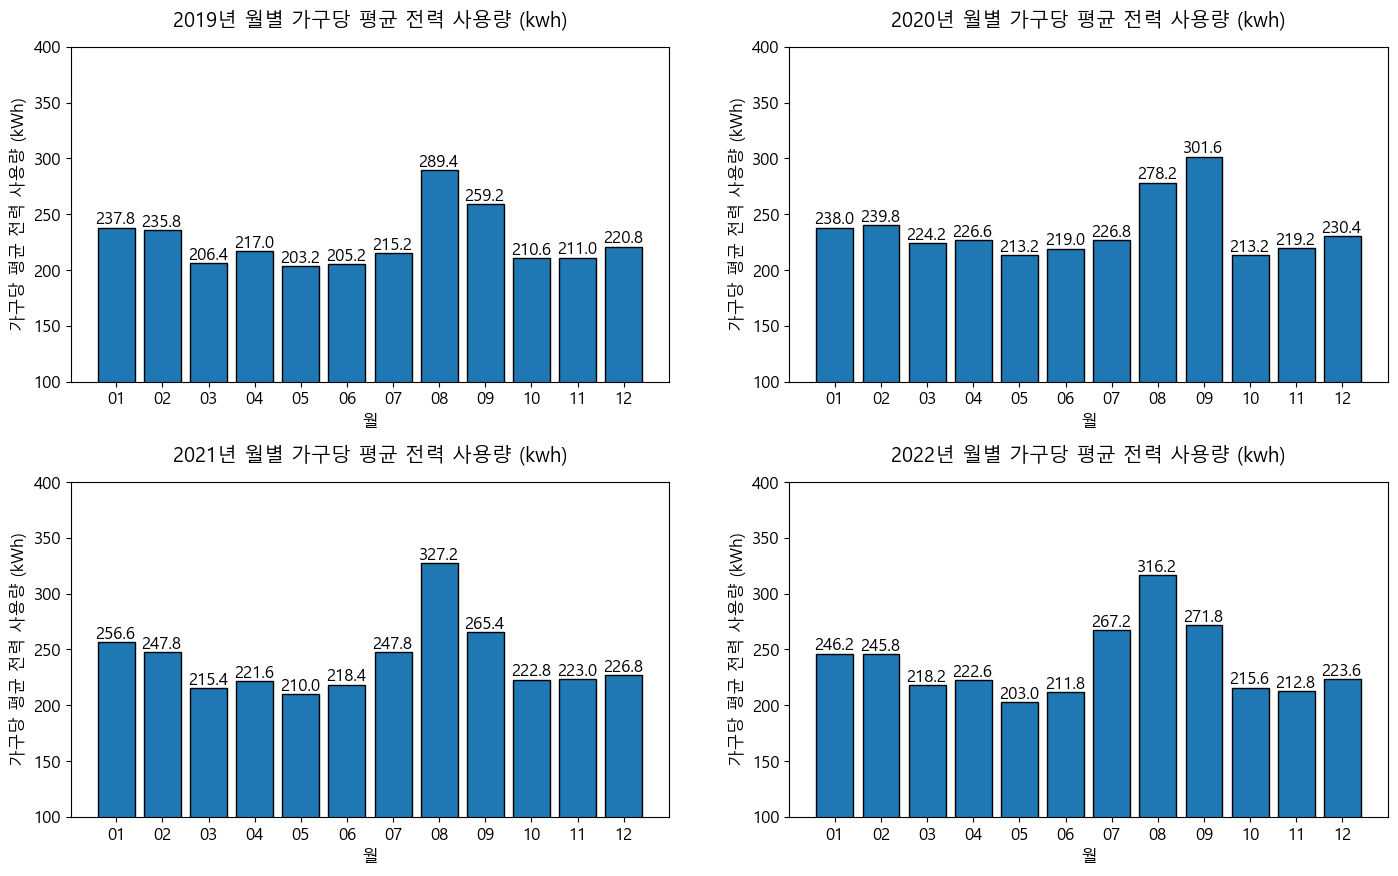

In [46]:
# 월별 가구당 평균전력 사용량을 년별로 그래프로 표현

plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.3) #subplot 사이의 여백을 만들어줌, wspace = 가로 여백, hspace = 세로여백
# 2019년 그래프
plt.subplot(2,2,1)
plt.bar(kwh19_df['월'],kwh19_df['가구당 평균 전력 사용량(kWh)'],edgecolor='black')
plt.title('2019년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100,400])
# 막대그래프 위에 값을 표현해주기 위해 for문을 이용해 text를 표현 
for i, v in enumerate(kwh19_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

# 2020년 그래프
plt.subplot(2,2,2)
plt.bar(kwh20_df['월'],kwh20_df['가구당 평균 전력 사용량(kWh)'],edgecolor='black')
plt.title('2020년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100,400])
for i, v in enumerate(kwh20_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
    
# 2021년 그래프
plt.subplot(2,2,3)
plt.bar(kwh21_df['월'],kwh21_df['가구당 평균 전력 사용량(kWh)'],edgecolor='black')
plt.title('2021년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylim([100,400])
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh21_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
    
# 2022년 그래프
plt.subplot(2,2,4)
plt.bar(kwh22_df['월'],kwh22_df['가구당 평균 전력 사용량(kWh)'],edgecolor='black')
plt.title('2022년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100 ,400])
for i, v in enumerate(kwh22_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
plt.show()

In [11]:
# 여러개의 엑셀파일로 나눠진 계약종별 전력사용량데이터를 병합

df_2 = pd.concat([pd.read_excel('data/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.01~06.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.07~12.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.01~06.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.07~12.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(21)/계약종별 전력사용량 월별_2021.01~06.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(21)/계약종별 전력사용량 월별_2021.07~12.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(21)/계약종별 전력사용량 월별_2022.01~06.xls'),
           pd.read_excel('data/광주광역시 용도별 월사용량(21)/계약종별 전력사용량 월별_2022.07~12.xls')],
         ignore_index=True)

In [12]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,201901,광주광역시,광산구,가로등,"11,891","2,660,449","288,886,605",108.6
1,201901,광주광역시,광산구,교육용,164,"6,741,847","699,917,616",103.8
2,201901,광주광역시,광산구,농사용,"5,739","6,108,046","284,320,122",46.5
3,201901,광주광역시,광산구,산업용,"3,083","176,730,544","22,196,237,782",125.6
4,201901,광주광역시,광산구,심 야,"1,463","3,610,824","263,009,079",72.8
...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,"26,773,505","4,076,579,360",152.3
1916,202212,광주광역시,서구,심 야,699,"1,273,849","122,462,022",96.1
1917,202212,광주광역시,서구,일반용,"20,502","63,473,543","10,215,853,633",160.9
1918,202212,광주광역시,서구,주택용,"76,911","35,741,374","4,461,869,338",124.8


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년월             1920 non-null   int64  
 1   시구             1920 non-null   object 
 2   시군구            1920 non-null   object 
 3   계약구분           1920 non-null   object 
 4   고객호수(호)        1920 non-null   object 
 5   사용량(kWh)       1920 non-null   object 
 6   전기요금(원)        1920 non-null   object 
 7   평균판매단가(원/kWh)  1920 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 120.1+ KB


In [14]:
# 고객호수와 사용량으로 평균전기 사용량을 계산하기 위해 ','를 제거해주고 정수형으로 변경
df_2['고객호수(호)'].replace(',', '',regex=True, inplace = True)
df_2['고객호수(호)'] = df_2['고객호수(호)'].astype('int64')
df_2['사용량(kWh)'].replace(',', '',regex=True, inplace = True)
df_2['사용량(kWh)'] = df_2['사용량(kWh)'].astype('int64')

In [15]:
# 위에서 변경한 컬럼들을 이용해 '고객당 평균 전력 사용량(kwh)'컬럼을 생성
df_2['고객당 평균 전력 사용량(kWh)'] = np.round(df_2['사용량(kWh)']/df_2['고객호수(호)'],1)

In [16]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh)
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1
...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7


In [17]:
# 년월 컬럼을 년과 월로 분리하기 위해 문자열로 타입을 변경
df_2['년월'] = df_2['년월'].astype(str)

In [18]:
# 년, 월 데이터를 리스트로 저장
year = df_2['년월'].apply(lambda x : x[:4])
month = df_2['년월'].apply(lambda x : x[4:])

In [19]:
# 년,월 컬럼을 생성
df_2['년']=year
df_2['월']=month

In [20]:
# df_2 데이터프레임을 그래프로 표현하기 위해 연도별로 데이터프레임을 분리
kwh19_df2 = df_2.loc[df_2['년']=='2019'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh19_df2 = kwh19_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh20_df2 = df_2.loc[df_2['년']=='2020'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh20_df2 = kwh20_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh21_df2 = df_2.loc[df_2['년']=='2021'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh21_df2 = kwh21_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh22_df2 = df_2.loc[df_2['년']=='2022'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh22_df2 = kwh22_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

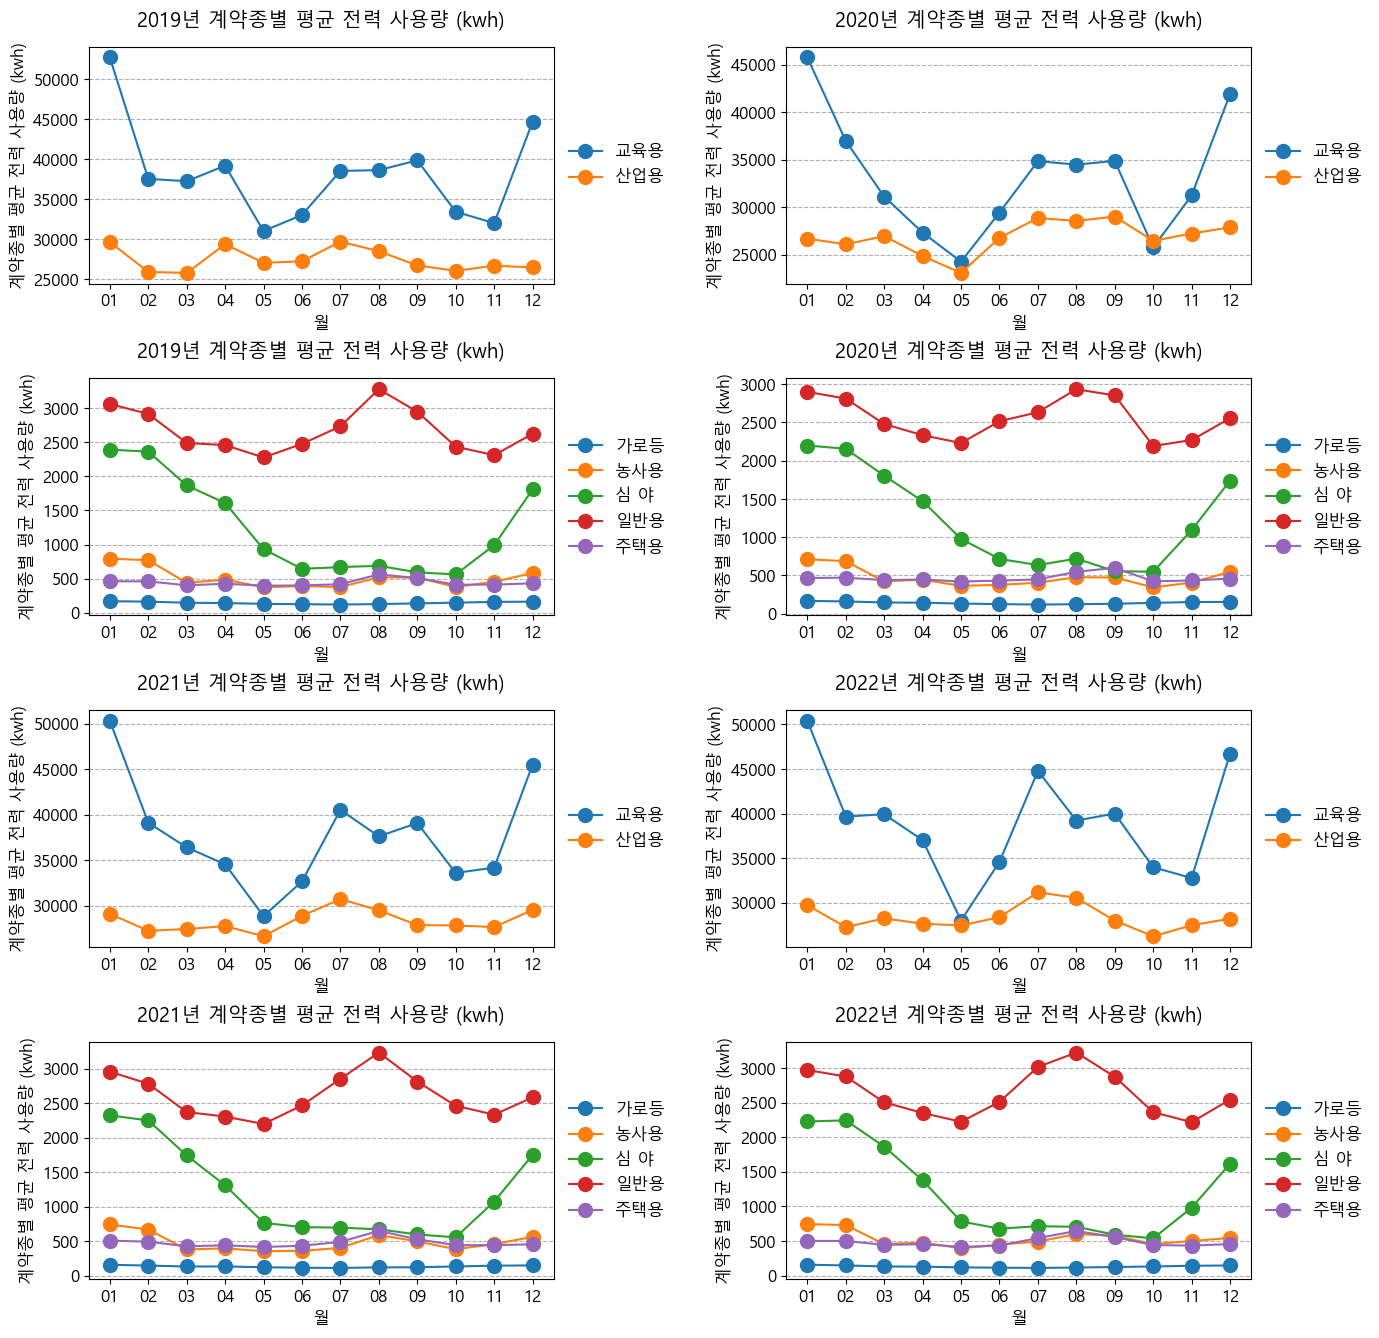

In [21]:
# 2019~22년의 계약종별 평균 전력사용량 그래프를 출력, 교육,산업용의 전력사용량이 너무 차이나기 때문에 그래프를 따로 분리

plt.figure(figsize=(15,16))

# 19년의 교육용, 산업용 그래프를 출력
plt.subplot(4,2,1)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh19_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 20년의 교육용, 산업용 그래프를 출력
plt.subplot(4,2,2)
plt.plot(kwh20_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 19년의 가로등', '농사용', '심 야', '일반용', '주택용 그래프를 출력
plt.subplot(4,2,3)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 20년의 가로등', '농사용', '심 야', '일반용', '주택용 그래프를 출력
plt.subplot(4,2,4)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 21년의 교육용, 산업용 그래프를 출력
plt.subplot(4,2,5)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh21_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 22년의 교육용, 산업용 그래프를 출력
plt.subplot(4,2,6)
plt.plot(kwh22_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 21년의 가로등', '농사용', '심 야', '일반용', '주택용 그래프를 출력
plt.subplot(4,2,7)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

# 22년의 가로등', '농사용', '심 야', '일반용', '주택용 그래프를 출력
plt.subplot(4,2,8)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()

In [22]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh),년,월
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7,2019,01
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8,2019,01
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3,2019,01
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2,2019,01
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1,2019,01
...,...,...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6,2022,12
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4,2022,12
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0,2022,12
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7,2022,12


In [23]:
# 계약종별 총 전력사용량 그래프를 확인하기 위해 새로운 데이터프레임을 생성
sumkwh19_df2 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)']].groupby('계약구분').sum()
sumkwh19_df2 = sumkwh19_df2.loc[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

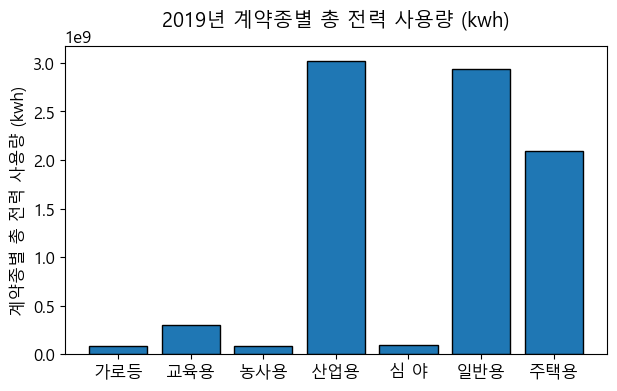

In [47]:
# 계약종별 총 전력사용량 그래프를 출력
plt.figure(figsize=(7,4))
plt.bar(sumkwh19_df2.index, height=sumkwh19_df2['사용량(kWh)'],edgecolor='black')
plt.title('2019년 계약종별 총 전력 사용량 (kwh)',pad = 15)
plt.ylabel('계약종별 총 전력 사용량 (kwh)')
plt.show()

In [25]:
# 년도별로 계약종별 총 전력사용량을 표현하기 위해 데이터프레임을 분리

sumplot_19 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_19 = sumplot_19[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_20 = df_2.loc[df_2['년']=='2020'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_20 = sumplot_20[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_21 = df_2.loc[df_2['년']=='2021'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_21 = sumplot_21[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_22 = df_2.loc[df_2['년']=='2022'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_22 = sumplot_22[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

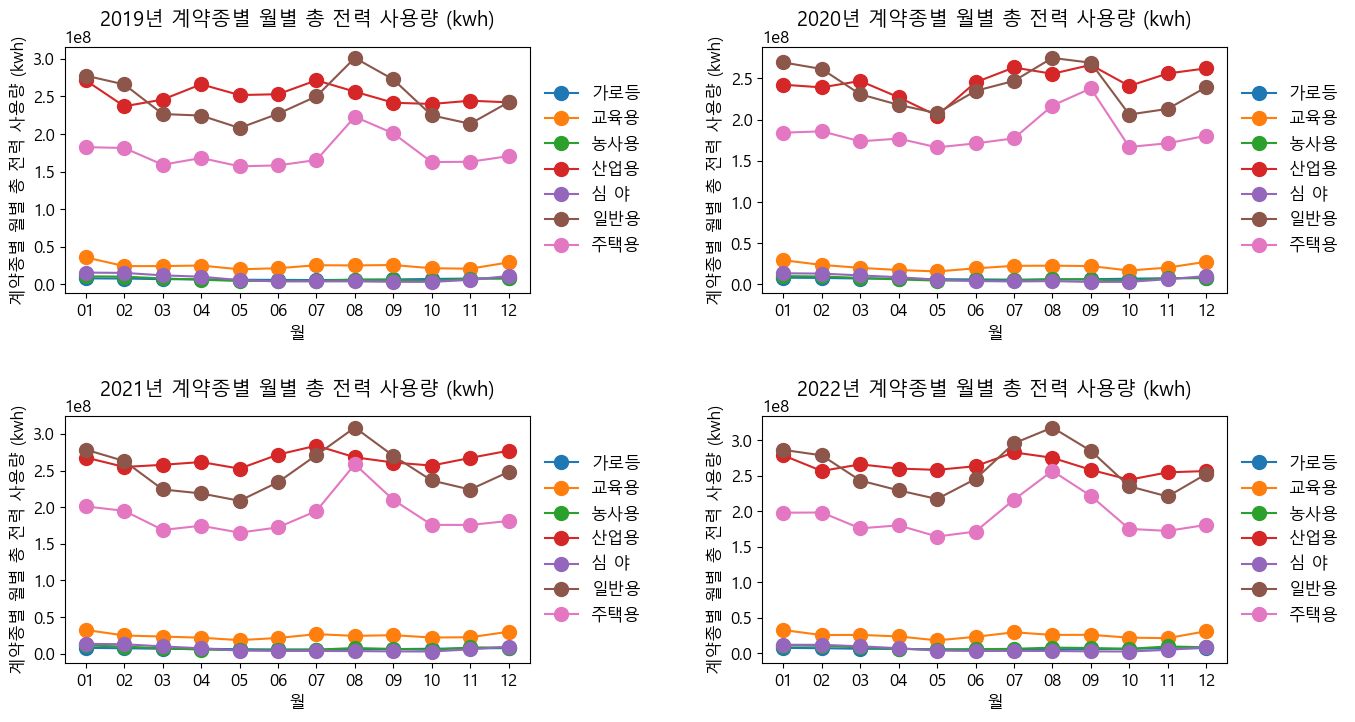

In [26]:
# 2019~22년 계약종별 월별 총 전력 사용량 그래프를 출력

# 2019년 계약종별 월별 총 전력 사용량 그래프를 출력
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.plot(sumplot_19, marker = 'o', markersize=10)
plt.legend(sumplot_19.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2019년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

# 2020년 계약종별 월별 총 전력 사용량 그래프를 출력
plt.subplot(2,2,2)
plt.plot(sumplot_20, marker = 'o', markersize=10)
plt.legend(sumplot_20.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2020년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

# 2021년 계약종별 월별 총 전력 사용량 그래프를 출력
plt.subplot(2,2,3)
plt.plot(sumplot_21, marker = 'o', markersize=10)
plt.legend(sumplot_21.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2021년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

# 2022년 계약종별 월별 총 전력 사용량 그래프를 출력
plt.subplot(2,2,4)
plt.plot(sumplot_22, marker = 'o', markersize=10)
plt.legend(sumplot_22.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2022년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.show()

In [27]:
# 월별 태양광 발전량 그래프를 출력하기 위해 데이터를 읽어옴
sun_df = pd.read_csv('data/한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv',encoding='cp949')

In [28]:
# 광주시의 태양광 발전량 데이터를 추출
sun_df=sun_df.loc[sun_df['지역']=='광주시']

In [29]:
# 년월일로 구성된 거래일자 컬럼을 년,월,일로 분리해 리스트에 저장
year = sun_df['거래일자'].apply(lambda x : x[:4])
month = sun_df['거래일자'].apply(lambda x : x[5:7])
day = sun_df['거래일자'].apply(lambda x : x[8:])

In [30]:
# sun_df 데이터프레임에 년,월,일 컬럼을 추가
sun_df['년'] = year
sun_df['월'] = month
sun_df['일'] = day

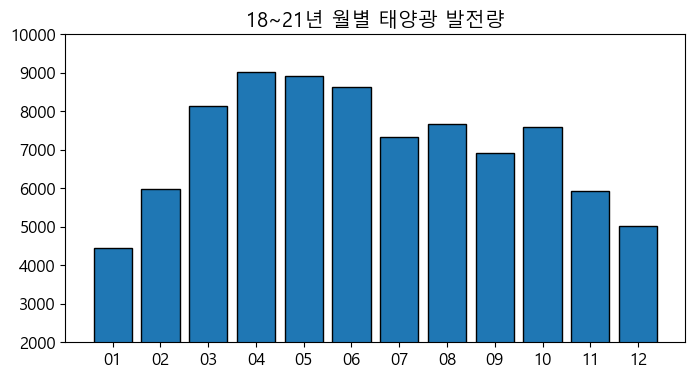

In [48]:
# 월별 태양광 발전량 그래프를 출력
plt.figure(figsize=(8,4))
plt.title('18~21년 월별 태양광 발전량')
plt.bar(sun_df.groupby('월').mean().index, sun_df.groupby('월').mean()['발전량 '],edgecolor='black')
plt.ylim([2000,10000])
plt.show()

In [32]:
# 습도 데이터를 읽어와 습도 데이터프레임을 생성
humidity = pd.read_csv('data/2019_2022습도.csv',encoding='cp949')

In [33]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     1464 non-null   object 
 1   지점명        1461 non-null   object 
 2   일시         1461 non-null   object 
 3   평균습도(%rh)  1461 non-null   float64
 4   최저습도(%rh)  1461 non-null   float64
dtypes: float64(2), object(3)
memory usage: 57.3+ KB


In [34]:
# 일시 컬럼을 년, 월로 분리해 리스트에 저장
year = []
month = []

humidity['일시'].apply(lambda x : year.append(str(x)[:4]))
humidity['일시'].apply(lambda x : month.append(str(x)[5:7]))
month

['01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',

In [35]:
# humidity 데이터프레임에 년, 월 컬럼을 생성
humidity['년']= year
humidity['월']= month

In [36]:
# 월별로 그래프를 표현하기위해 월단위로 groupby
humidity.groupby('월').mean()['평균습도(%rh)']

월
            NaN
01    63.939516
02    59.886726
03    62.904032
04    57.707500
05    64.208871
06    79.102500
07    86.161290
08    86.862097
09    81.805000
10    69.708065
11    67.425833
12    64.408065
Name: 평균습도(%rh), dtype: float64

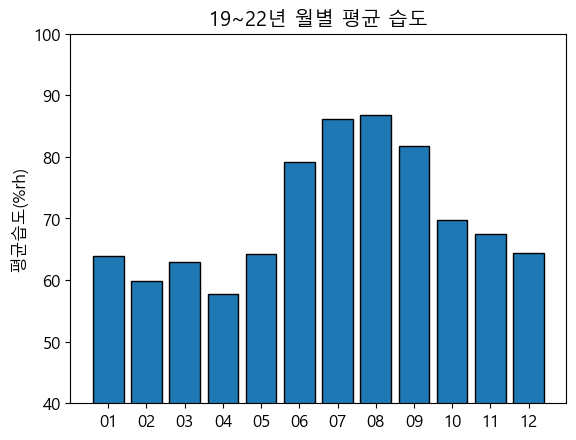

In [50]:
# 2019~22년 월별 평균습도 그래프를 출력
plt.title('19~22년 월별 평균 습도')
plt.bar(humidity.groupby('월').mean().index,humidity.groupby('월').mean()['평균습도(%rh)'],edgecolor='black')
plt.ylim(40,100)
plt.ylabel('평균습도(%rh)')
plt.show()

In [38]:
# 2019~21년 전국 전력사용량을 얻기위해 data 데이터프레임을 생성
data =pd.read_csv('data/2019_2021 수요관리후 발전단 전력수요실적.csv', encoding='cp949',index_col='날짜')
data['총전력사용량'] = pd.read_csv('data/2019_2021 수요관리후 발전단 전력수요실적.csv', encoding='cp949',index_col='날짜').sum(axis=1)

In [39]:
# 2019~21년 기상데이터로 data_ 데이터프레임을 생성
data_ = pd.read_excel('data/2019_2021기상데이터.xlsx',index_col='날짜')

In [40]:
# 총 전력 사용량 컬럼을 summ리스트로 저장
summ = []
data['총전력사용량'].apply(lambda x : summ.append(x))

날짜
2019-01-01    None
2019-01-02    None
2019-01-03    None
2019-01-04    None
2019-01-05    None
              ... 
2021-12-27    None
2021-12-28    None
2021-12-29    None
2021-12-30    None
2021-12-31    None
Name: 총전력사용량, Length: 1096, dtype: object

In [41]:
# 기상데이터 데이터프레임에 총전력사용량 컬럼을 추가
data_['총전력사용량']=summ

In [42]:
# 기상데이터에 년 컬럼을 추가
temp =list(humidity[humidity['년']=='2019']['년'])
temp+=list(humidity[humidity['년']=='2020']['년'])
temp+=list(humidity[humidity['년']=='2021']['년'])
data_['년'] = temp

In [43]:
data_.columns

Index(['평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '평균습도(%rh)', '일조합(hr)', '일조율(%)',
       '일사합(MJ/m2)', '강수량(mm)', '평균풍속(m/s)', '총전력사용량', '년'],
      dtype='object')

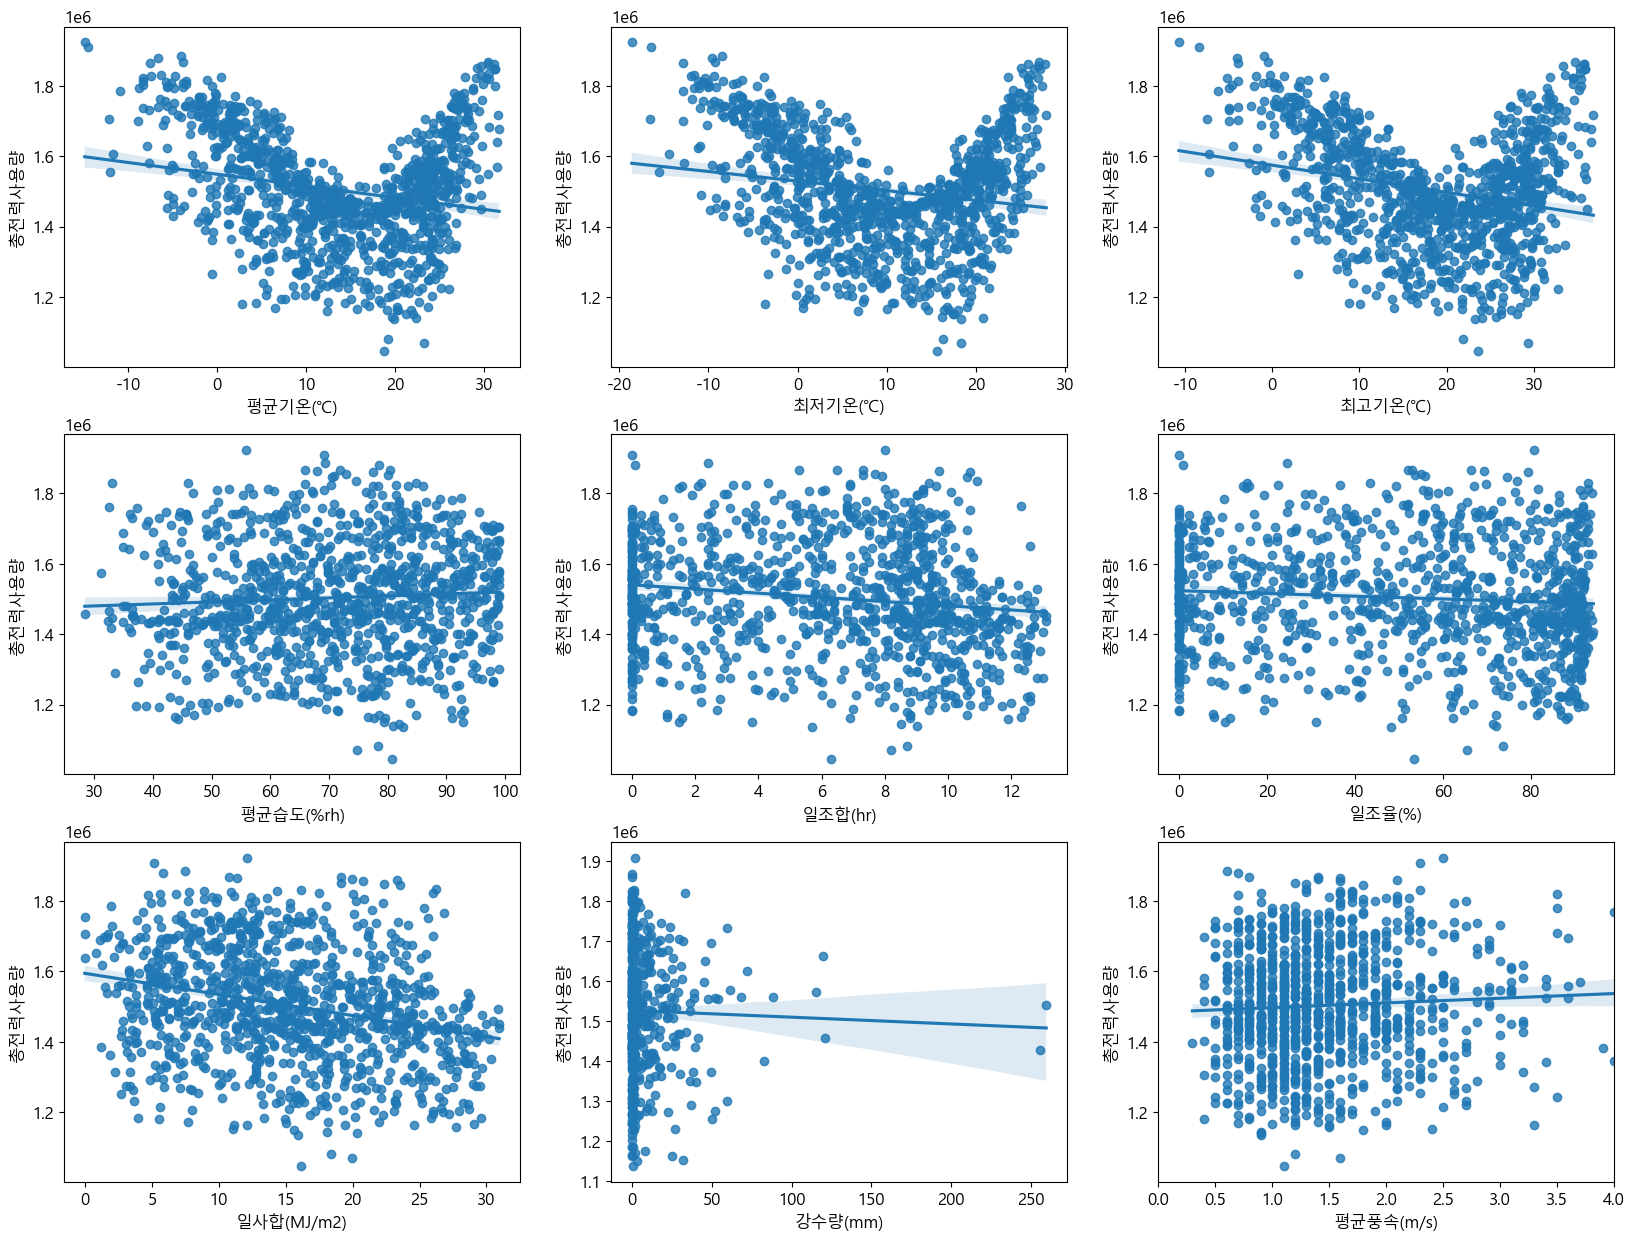

In [44]:
# 컬럼별 총전력사용량에 대한 regplot을 출력
lm_features = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '평균습도(%rh)', '일조합(hr)', '일조율(%)','일사합(MJ/m2)','강수량(mm)','평균풍속(m/s)']
fig, axs = plt.subplots(figsize=(20,15), ncols=3,nrows = 3)
for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    if row==2 and col ==2:
        plt.xlim(0,4)
    sns.regplot(x=feature, y='총전력사용량',data = data_, ax=axs[row][col]) 

Text(0.5, 0, '평균기온(℃)')

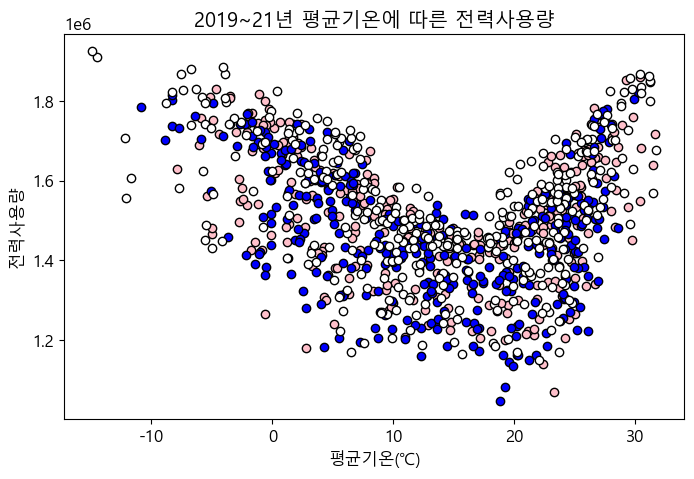

In [45]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,5))
plt.title('2019~21년 평균기온에 따른 전력사용량')
plt.scatter(data_[data_['년']=='2019']['평균기온(℃)'],data_[data_['년']=='2019']['총전력사용량'], color='pink',edgecolors='black')
plt.scatter(data_[data_['년']=='2020']['평균기온(℃)'],data_[data_['년']=='2020']['총전력사용량'],color='blue',edgecolors='black')
plt.scatter(data_[data_['년']=='2021']['평균기온(℃)'],data_[data_['년']=='2021']['총전력사용량'],color='white',edgecolors='black')
plt.ylabel('전력사용량')
plt.xlabel('평균기온(℃)')